In [74]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [5]:
import pandas as pd

df = pd.read_csv('Datasets/all_data_clean.csv')
df

,hash_name,date,price,quantity
0,'Blueberries' Buckshot | NSWC SEAL,2020-12-03,2.501,50
1,'Blueberries' Buckshot | NSWC SEAL,2020-12-04,1.207,1038
2,'Blueberries' Buckshot | NSWC SEAL,2020-12-05,1.185,803
3,'Blueberries' Buckshot | NSWC SEAL,2020-12-06,1.258,541
4,'Blueberries' Buckshot | NSWC SEAL,2020-12-07,1.334,430
...,...,...,...,...
25257188,★ Ursus Knife | Urban Masked (Well-Worn),2024-03-11,125.990,1
25257189,★ Ursus Knife | Urban Masked (Well-Worn),2024-03-14,118.950,1
25257190,★ Ursus Knife | Urban Masked (Well-Worn),2024-03-15,136.634,2
25257191,★ Ursus Knife | Urban Masked (Well-Worn),2024-03-16,118.137,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25257193 entries, 0 to 25257192
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   hash_name  object 
 1   date       object 
 2   price      float64
 3   quantity   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 770.8+ MB


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [72]:
grouped = df.groupby('hash_name')

# Create a dictionary to store DataFrames for each hash_name with date as index
dfs = {}
names = []

# Iterate over each group and store it in the dictionary with date as index
for idx, (name, group_df) in enumerate(grouped):
    if idx > 5:
        break
    # Convert 'date' column to datetime
    group_df['date'] = pd.to_datetime(group_df['date'])
    
    # Set 'date' column as index
    #group_df.set_index('date', inplace=True)
    names.append(name)
    # Store the DataFrame in the dictionary
    dfs[name] = group_df

In [73]:
names

["'Blueberries' Buckshot | NSWC SEAL",
 "'Medium Rare' Crasswater | Guerrilla Warfare",
 "'The Doctor' Romanov | Sabre",
 "'Two Times' McCoy | TACP Cavalry",
 "'Two Times' McCoy | USAF TACP",
 '10 Year Birthday Sticker Capsule']

In [76]:
dfs

{"'Blueberries' Buckshot | NSWC SEAL":                                hash_name       date     price  quantity
 0     'Blueberries' Buckshot | NSWC SEAL 2020-12-03  2.501000        50
 1     'Blueberries' Buckshot | NSWC SEAL 2020-12-04  1.207000      1038
 2     'Blueberries' Buckshot | NSWC SEAL 2020-12-05  1.185000       803
 3     'Blueberries' Buckshot | NSWC SEAL 2020-12-06  1.258000       541
 4     'Blueberries' Buckshot | NSWC SEAL 2020-12-07  1.334000       430
 ...                                  ...        ...       ...       ...
 1205  'Blueberries' Buckshot | NSWC SEAL 2024-03-22  9.153619        51
 1206  'Blueberries' Buckshot | NSWC SEAL 2024-03-23  9.386526        53
 1207  'Blueberries' Buckshot | NSWC SEAL 2024-03-24  9.251524        59
 1208  'Blueberries' Buckshot | NSWC SEAL 2024-03-25  9.259286        55
 1209  'Blueberries' Buckshot | NSWC SEAL 2024-03-26  9.503667        32
 
 [1210 rows x 4 columns],
 "'Medium Rare' Crasswater | Guerrilla Warfare":          

In [75]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [82]:
train_test_dfs = {}

# Ratio for train-test split
train_size_ratio = 0.8  # 80% for train set

# Iterate over each DataFrame in the dictionary
for name, df in dfs.items():
    # Calculate the index to split the data
    split_index = int(len(df) * train_size_ratio)
    
    # Split the DataFrame into train and test sets
    train_df = df.iloc[:split_index]
    test_df = df.iloc[split_index:]
    
    # Store the train and test sets in the dictionary
    train_test_dfs[name] = {'train_df': train_df, 'test_df': test_df}

In [83]:
train_test_dfs

{"'Blueberries' Buckshot | NSWC SEAL": {'train_df':                               hash_name       date  price  quantity
  0    'Blueberries' Buckshot | NSWC SEAL 2020-12-03  2.501        50
  1    'Blueberries' Buckshot | NSWC SEAL 2020-12-04  1.207      1038
  2    'Blueberries' Buckshot | NSWC SEAL 2020-12-05  1.185       803
  3    'Blueberries' Buckshot | NSWC SEAL 2020-12-06  1.258       541
  4    'Blueberries' Buckshot | NSWC SEAL 2020-12-07  1.334       430
  ..                                  ...        ...    ...       ...
  963  'Blueberries' Buckshot | NSWC SEAL 2023-07-24  4.674        88
  964  'Blueberries' Buckshot | NSWC SEAL 2023-07-25  3.879        90
  965  'Blueberries' Buckshot | NSWC SEAL 2023-07-26  4.773        93
  966  'Blueberries' Buckshot | NSWC SEAL 2023-07-27  4.684        95
  967  'Blueberries' Buckshot | NSWC SEAL 2023-07-28  4.821        83
  
  [968 rows x 4 columns],
  'test_df':                                hash_name       date     price  quant

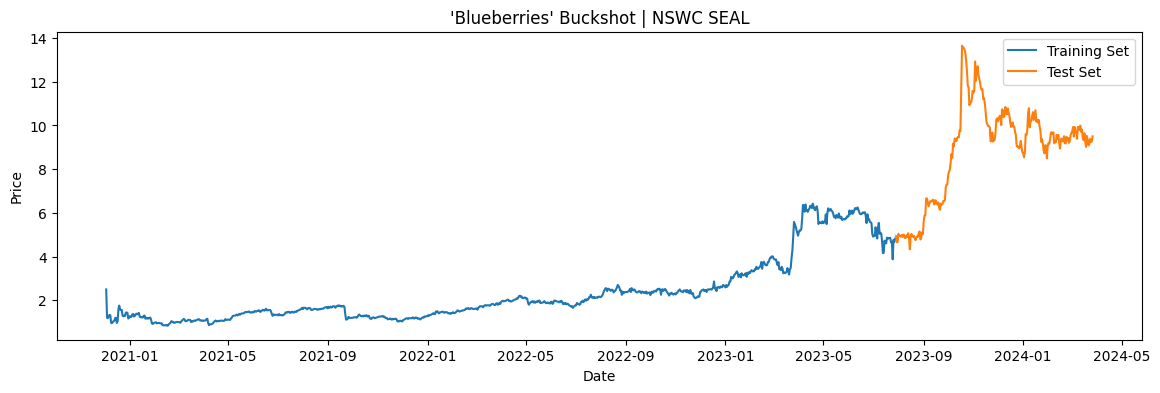

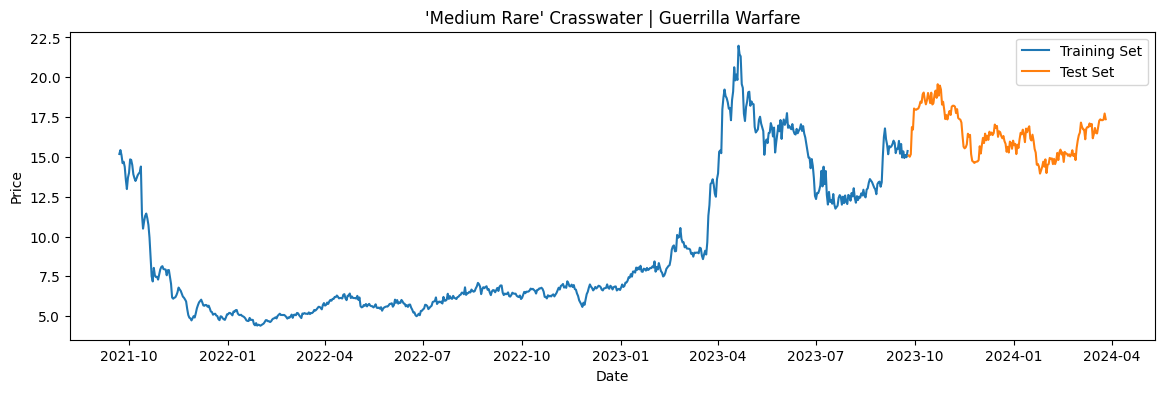

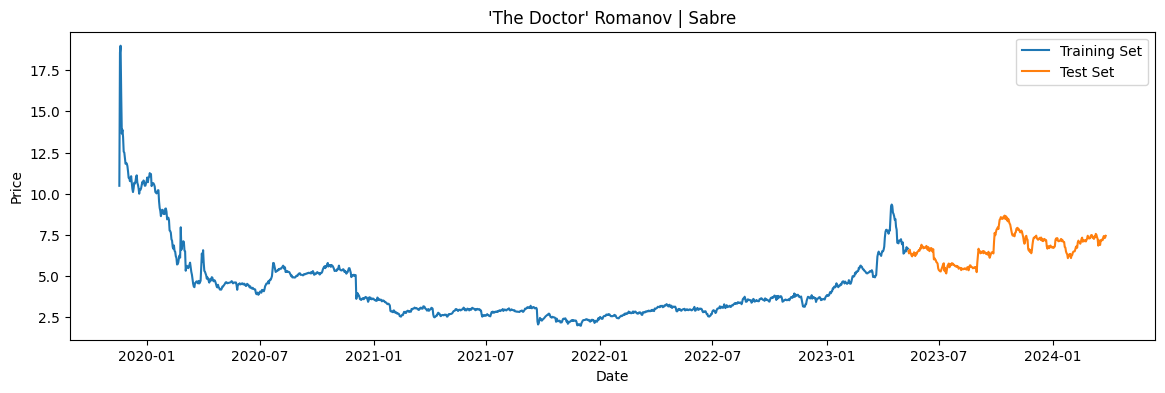

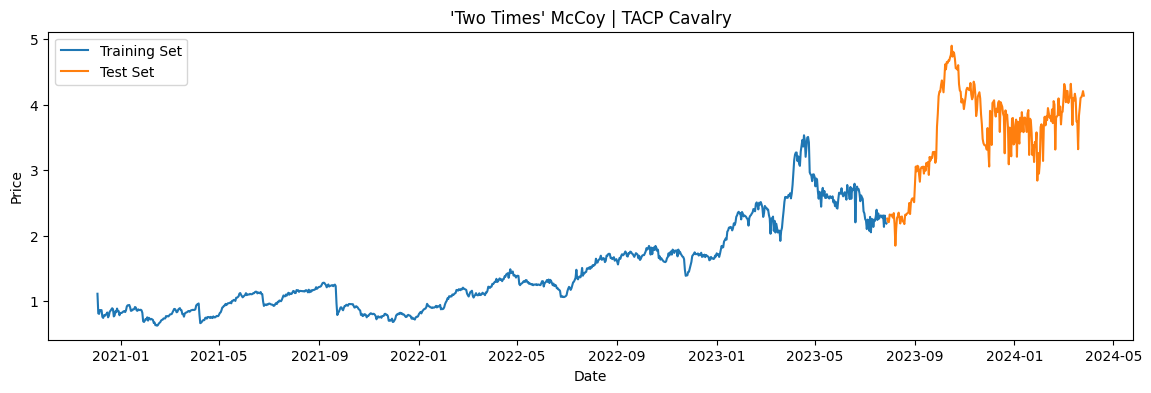

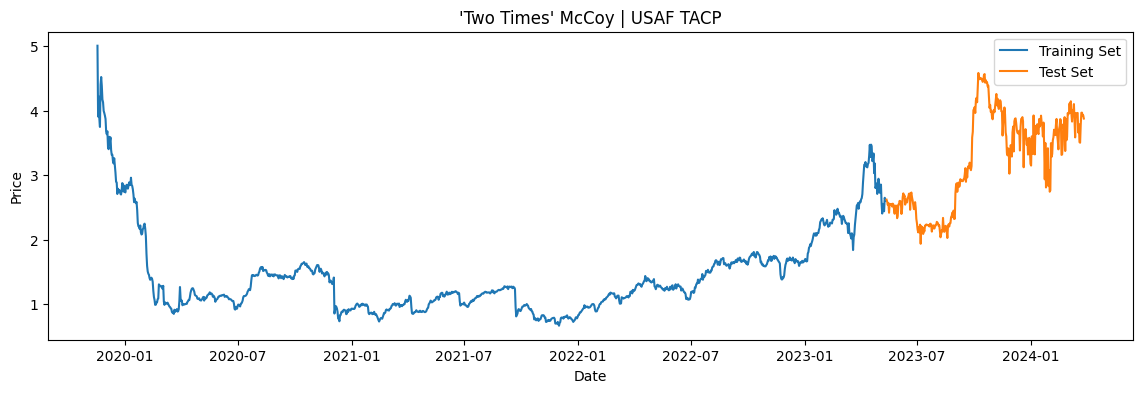

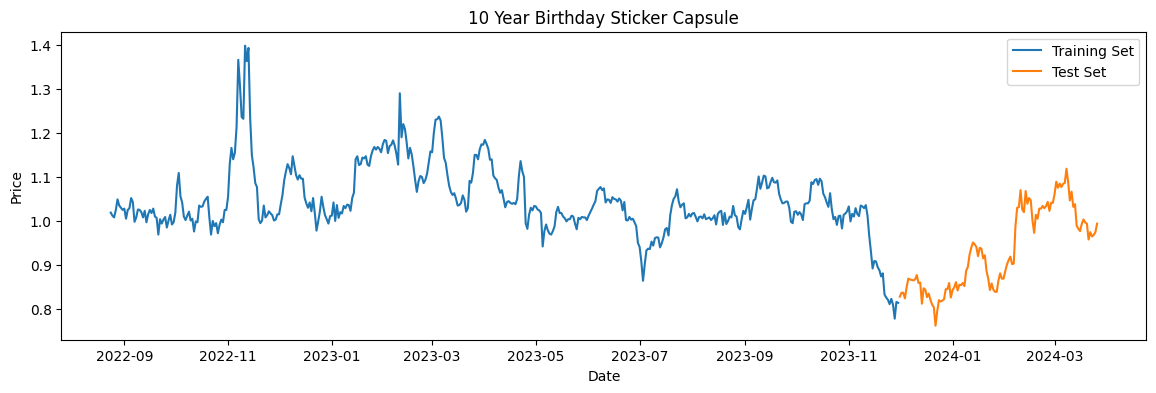

In [89]:
import matplotlib.pyplot as plt

# Plot train and test sets for the first 5 stocks
for name, data in train_test_dfs.items():
    train_df = data['train_df']
    test_df = data['test_df']
    
    # Plot
    plt.figure(figsize=(14,4))
    plt.plot(train_df['date'],train_df['price'], label="Training Set")
    plt.plot(test_df['date'],test_df['price'], label="Test Set")
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend()
    plt.title(name)
    plt.show()

In [90]:
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for name, data in train_test_dfs.items():
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data['train_df']['price'])
    a1 = np.array(data['test_df']['price'])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[name] = sc.fit_transform(a0)
    transform_test[name] = sc.fit_transform(a1)
    scaler[name] = sc
    
del a0
del a1

In [91]:
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

'Blueberries' Buckshot | NSWC SEAL (968, 1)
'Medium Rare' Crasswater | Guerrilla Warfare (733, 1)
'The Doctor' Romanov | Sabre (1272, 1)
'Two Times' McCoy | TACP Cavalry (968, 1)
'Two Times' McCoy | USAF TACP (1272, 1)
10 Year Birthday Sticker Capsule (464, 1)


'Blueberries' Buckshot | NSWC SEAL (242, 1)
'Medium Rare' Crasswater | Guerrilla Warfare (184, 1)
'The Doctor' Romanov | Sabre (319, 1)
'Two Times' McCoy | TACP Cavalry (242, 1)
'Two Times' McCoy | USAF TACP (319, 1)
10 Year Birthday Sticker Capsule (117, 1)


In [100]:
trainset = {}
testset = {}
for j in names:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(60,transform_train[j].shape[0]):
        X_train.append(transform_train[j][i-60:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(60, transform_test[j].shape[0]):
        X_test.append(transform_test[j][i-60:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [101]:
arr_buff = []
for i in names:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=names)

,X_train,y_train,X_test,y_test
'Blueberries' Buckshot | NSWC SEAL,"(908, 60, 1)","(908,)","(182, 60, 1)","(182,)"
'Medium Rare' Crasswater | Guerrilla Warfare,"(673, 60, 1)","(673,)","(124, 60, 1)","(124,)"
'The Doctor' Romanov | Sabre,"(1212, 60, 1)","(1212,)","(259, 60, 1)","(259,)"
'Two Times' McCoy | TACP Cavalry,"(908, 60, 1)","(908,)","(182, 60, 1)","(182,)"
'Two Times' McCoy | USAF TACP,"(1212, 60, 1)","(1212,)","(259, 60, 1)","(259,)"
10 Year Birthday Sticker Capsule,"(404, 60, 1)","(404,)","(57, 60, 1)","(57,)"


In [102]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
for i in names:
    print("Fitting to", i)
    regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=100, batch_size=200)

Fitting to 'Blueberries' Buckshot | NSWC SEAL
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 0.0830
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 0.0171
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - loss: 0.0173
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - loss: 0.0162
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - loss: 0.0121
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - loss: 0.0145
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 0.0092
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - loss: 0.0087
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: 0.0105
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - loss: 0.0178
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - loss: 0.0080
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - loss: 0.0094
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.0209
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 0.0074
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - loss: 0.0122
Epoch 16/100
5/5

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


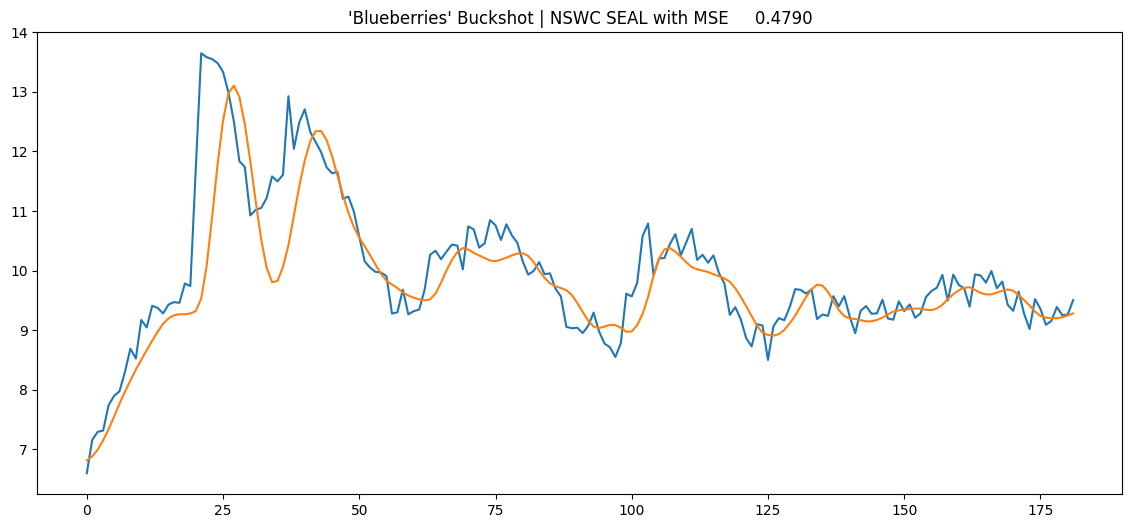

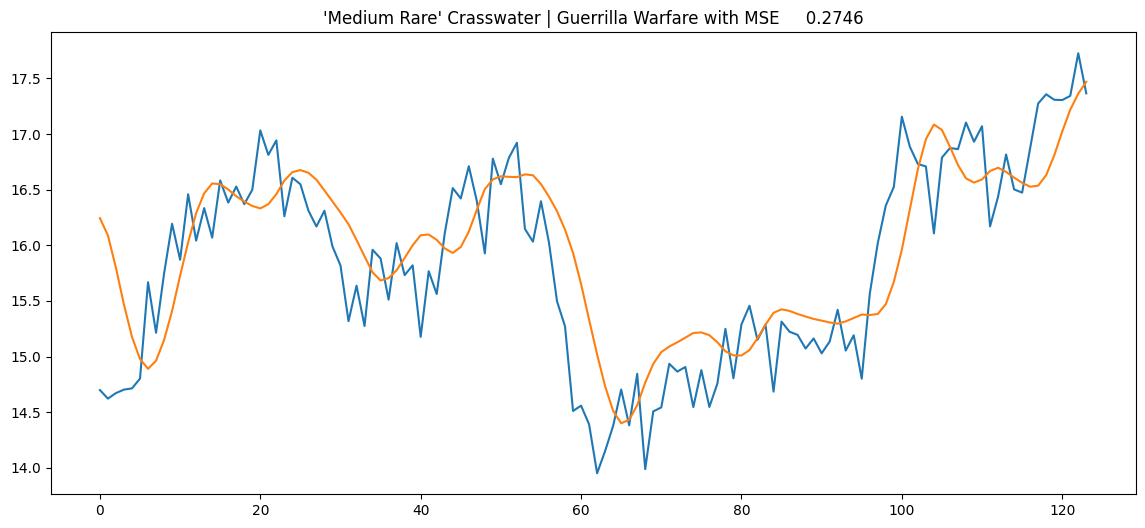

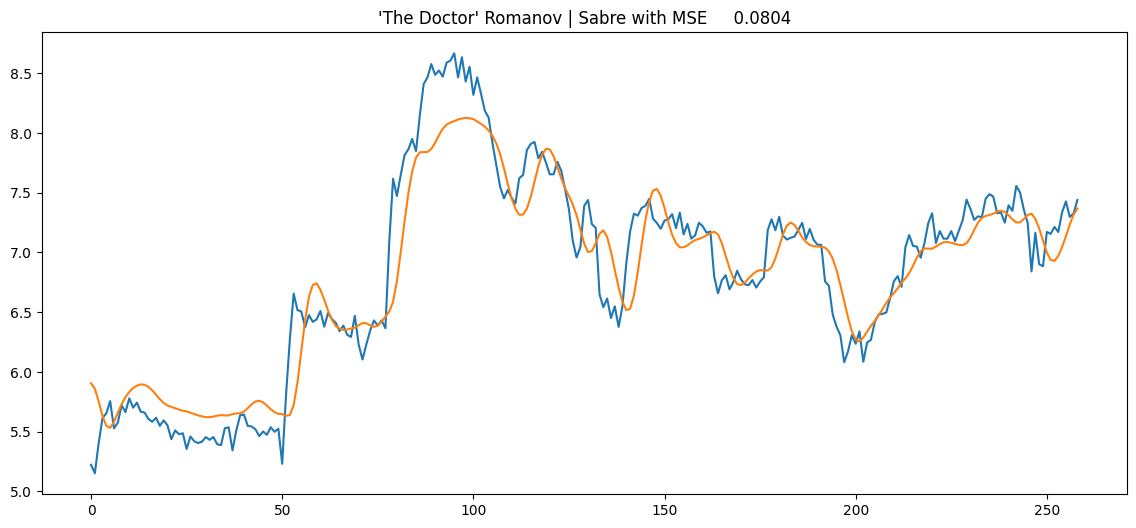

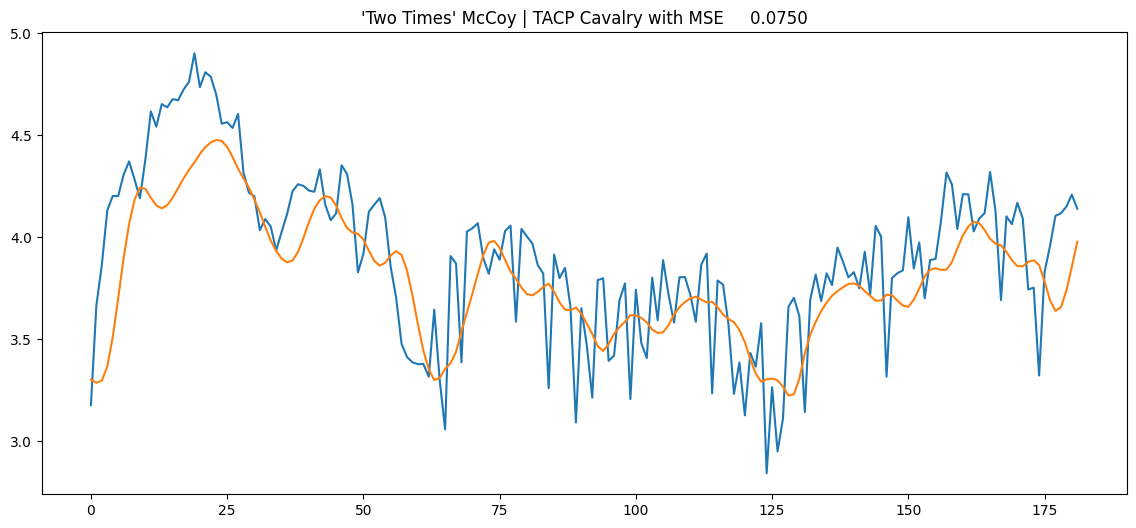

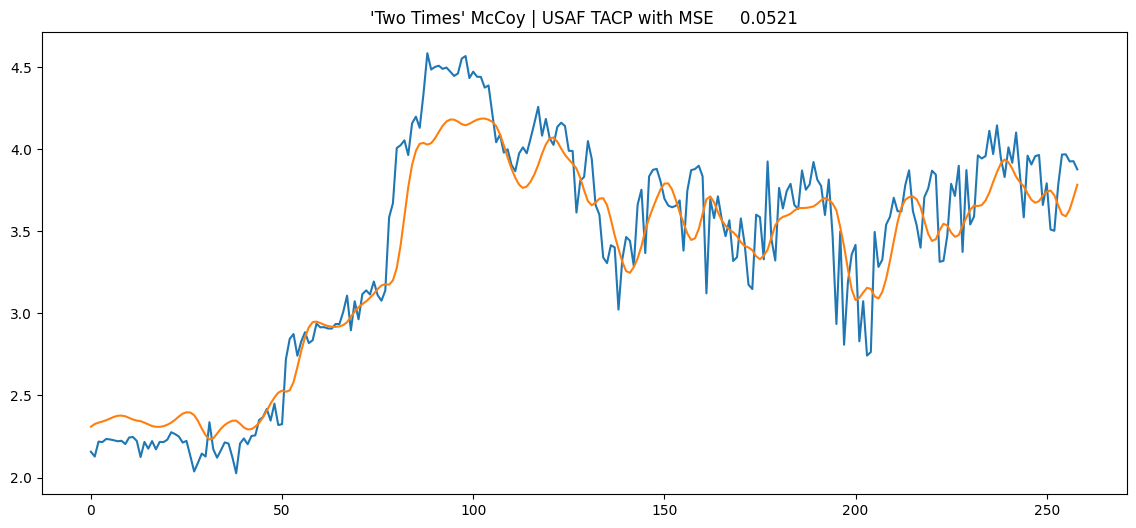

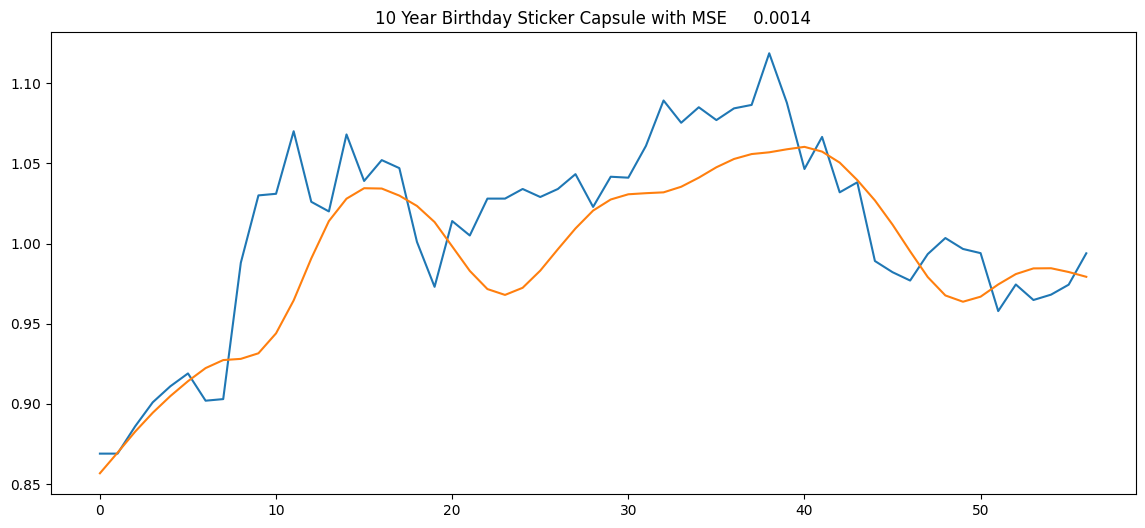

In [103]:
pred_result = {}
for i in names:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)

In [107]:
regressor.save("model.keras")